In [6]:
%load_ext autoreload
%autoreload 2


In [7]:
from simple_transformer import Transformer
from dataset import StreaksDataset
import datasets.datasets as datasets
import torch
import utils

ModuleNotFoundError: No module named 'datasets'

In [116]:

model = Transformer()
model.eval()
batch_size = 8
inputs = torch.randn(batch_size, 512, 32)
numeric_features = torch.rand(batch_size,5)
mask = torch.ones(batch_size, 512, dtype=torch.bool)
mask[:, 256:] = 0
outputs = model(inputs, numeric_features, mask)
print(outputs.shape)
print(outputs)

torch.Size([8, 1])
tensor([[ 0.2081],
        [ 0.0524],
        [ 0.0327],
        [-0.0637],
        [-0.2525],
        [-0.0735],
        [ 0.1891],
        [ 0.2999]], grad_fn=<AddmmBackward0>)


In [117]:

# Print the number of parameters
num_params = sum(p.numel() for p in model.parameters())

In [118]:
print(num_params)

125633


In [17]:

# load all images
# images_train = 
# 
# train_dataset = StreaksDataset(


AttributeError: module 'datasets' has no attribute 'split_data'

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
train=0.8
val=0.1
test=0.1
seed=1104

# Load the data
good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
numerical_data_df = pd.read_csv(os.path.join(utils.get_project_root(), 'datasets/auxiliary_data.csv'))
targets_df = pd.read_csv(os.path.join(utils.get_project_root(), 'datasets/targets.csv'))
# Split data by filenames
file_names = good_data['file_name'].unique()
file_names_temp, file_names_test = train_test_split(file_names, train_size=train+val, random_state=seed)
file_names_train, file_names_val = train_test_split(file_names_temp, train_size=train/(train+val), random_state=seed + 1)
 
train_data = good_data[good_data['file_name'].isin(file_names_train)]
val_data = good_data[good_data['file_name'].isin(file_names_val)]
test_data = good_data[good_data['file_name'].isin(file_names_test)]

def get_data(data):
    images = [
        torch.tensor(np.load(utils.get_strip_file_path(row)), dtype=torch.float) for (_, row) in data.iterrows()
    ]
    numeric = torch.tensor(
        pd.merge(data, numerical_data_df, on='file_name')[numerical_data_df.columns].drop(columns=['file_name']).to_numpy()
    )
    targets = torch.tensor(
        pd.merge(data.drop(columns=['ang_vel[deg/s]']), targets_df, on=['file_name', 'extension', 'ID'])['ang_vel[deg/s]'].to_numpy()
    )
    return images, numeric, targets

print(get_data(train_data)[0][0].shape)

train_dataset = StreaksDataset(*get_data(train_data))

val_dataset = StreaksDataset(*get_data(val_data), 
                             images_mean=train_dataset.images_mean,
                             images_std=train_dataset.images_std,
                             numeric_features_mean=train_dataset.numeric_features_mean,
                             numeric_features_std=train_dataset.numeric_features_std,
                             targets_mean=train_dataset.targets_mean,
                             targets_std=train_dataset.targets_std)
test_dataset = StreaksDataset( *get_data(test_data),
                               images_mean=train_dataset.images_mean,
                               images_std=train_dataset.images_std,
                               numeric_features_mean=train_dataset.numeric_features_mean,
                               numeric_features_std=train_dataset.numeric_features_std,
                               targets_mean=train_dataset.targets_mean,
                               targets_std=train_dataset.targets_std)
train_dataset.__getitem__(1)[0].shape




In [3]:
from train import train

train()


Epoch 1/10 - Training:   0%|          | 0/59 [00:00<?, ?it/s]

Numeric features shape:  torch.Size([16, 7])


KeyboardInterrupt: 

In [10]:
from transformer_artifical_data import artificial_transformer

import torch

model = artificial_transformer.Transformer()


data = torch.rand(8,200,32)
targets = torch.randn(8,1)
mask = torch.zeros(8, 200, dtype=torch.bool)

model.forward(data, mask)



tensor([[0.0806],
        [0.0806],
        [0.0806],
        [0.0806],
        [0.0806],
        [0.0806],
        [0.0806],
        [0.0806]], grad_fn=<AddmmBackward0>)

Start of train()
Data loaders initialized
Created new model
Created new optimizer
Starting training


Epoch [1/1], Training Loss: 1.0066


Epoch 1/1 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]/home/dofri/epfl/semester_project/venv/lib/python3.10/site-packages/torch/nn/modules/transformer.py:502: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(


Validation Loss: 1.1202, Validation Mean Error: -0.6873 
Validation loss improved to 1.1202. Saving model.
Loaded best model based on validation loss.


Test Loss: 1.8209
Training complete!
Correlation between True Frequency and MSE: 0.6354, p-value: 4.8362e-02
Correlation between Width and MSE: -0.5784, p-value: 7.9843e-02
Mean squared error: 2.3195, Mean error: -0.9302, Mean absolute error: 1.3463


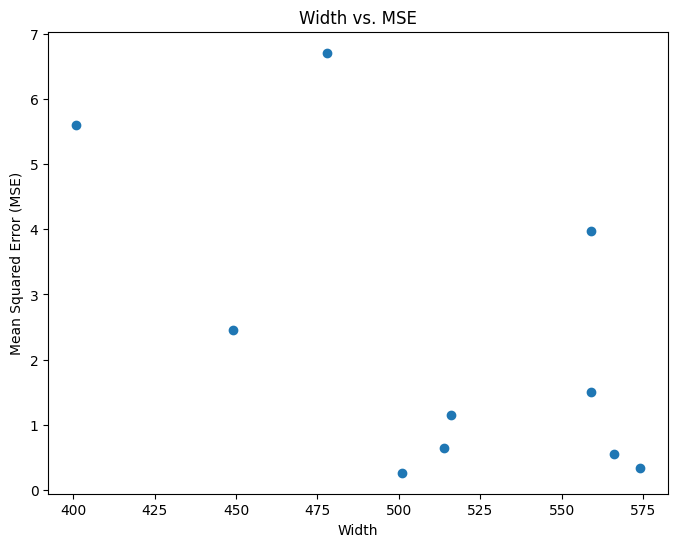

In [12]:
from transformer_artifical_data import artificial_dataset
from src.analysis.artificial_model_analysis import evaluate_model
from src.analysis.artificial_model_analysis import analyze_results
from src.models.transformer_artifical_data import artificial_train

# Dummy test dataset
datasets, dfs = artificial_dataset.split_data_into_datasets(train=.333, val=.333, test=.333, no_samples=30)
# model = artificial_transformer.Transformer()

model, optimizer, trainin_losses, validation_losses, test_loss = artificial_train.train(1, datasets['train'], datasets['val'], datasets['test'])

eval_df = evaluate_model(model, datasets['test'], dfs['test'])
analyze_results(eval_df)




Start of train()
Data loaders initialized
Using existing model
Created new optimizer
Starting training


Epoch [1/1], Training Loss: 1.0439


Validation Loss: 1.2251, Validation Mean Error: -0.7598 
Validation loss improved to 1.2251. Saving model.
Loaded best model based on validation loss.


Test Loss: 2.0679
Training complete!
Correlation between True Frequency and MSE: 0.8199, p-value: 3.6846e-03
Correlation between Width and MSE: -0.4484, p-value: 1.9370e-01
Mean squared error: 3.2932, Mean error: -1.3541, Mean absolute error: 1.6064


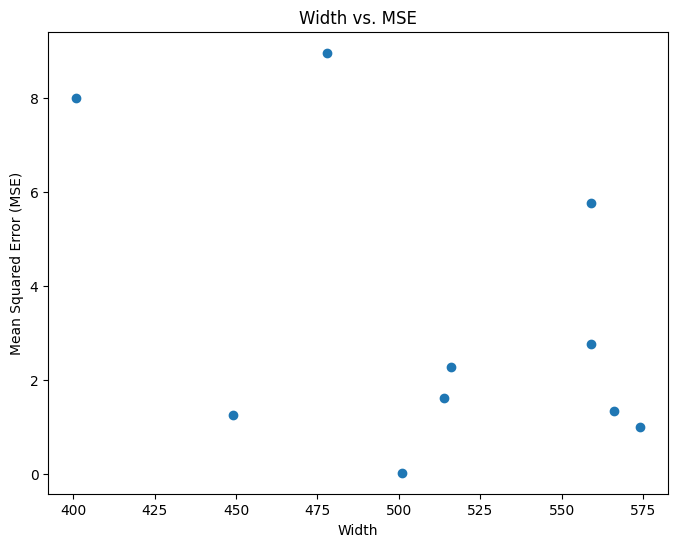

In [13]:
from src.models.transformer_artifical_data.artificial_transformer_cls import TransformerWCLS
# Dummy test dataset
datasets, dfs = artificial_dataset.split_data_into_datasets(train=.333, val=.333, test=.333, no_samples=30)
model = TransformerWCLS()

model, optimizer, trainin_losses, validation_losses, test_loss = artificial_train.train(1, datasets['train'], datasets['val'], datasets['test'], model=model)

eval_df = evaluate_model(model, datasets['test'], dfs['test'])
analyze_results(eval_df)





In [7]:
# import zipfile
# import os
# from src import utils
# zip_path = os.path.join(utils.get_project_root(), 'src','datasets','artificial_strips.zip')
# extract_to = os.path.join(utils.get_project_root(), 'src', 'datasets')
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)
#     print(f"Unzipped {zip_path} to {extract_to}")

Unzipped /home/dofri/epfl/semester_project/src/datasets/artificial_strips.zip to /home/dofri/epfl/semester_project/src/datasets


In [55]:
from src.models.cnn.simple_cnn import SimpleCNN 
from src.models.transformer_artifical_data import artificial_transformer 
cnn_model = SimpleCNN()
transformer_model =  artificial_transformer.Transformer()



# print model number of parameters
num_params_cnn = sum(p.numel() for p in cnn_model.parameters())
num_params_transformer = sum(p.numel() for p in transformer_model.parameters())
print(num_params_cnn)
print(num_params_transformer)

2542977
607361


Start of train()
Data loaders initialized
Created new model
Created new optimizer
Starting training


Epoch [1/1], Training Loss: 0.8990


Validation Loss: 1.8312, Validation Mean Error: -0.3942 
Validation loss improved to 1.8312. Saving model.
Loaded best model based on validation loss.


/home/dofri/epfl/semester_project/src/analysis/artificial_model_analysis.py:147: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  width_mse_corr, width_mse_pval = pearsonr(widths, mses)


Test Loss: 2.1701
Training complete!
Correlation between True Frequency and MSE: 0.6610, p-value: 3.7419e-02
Correlation between Width and MSE: nan, p-value: nan
Mean squared error: 1.9570, Mean error: -0.2539, Mean absolute error: 1.0868


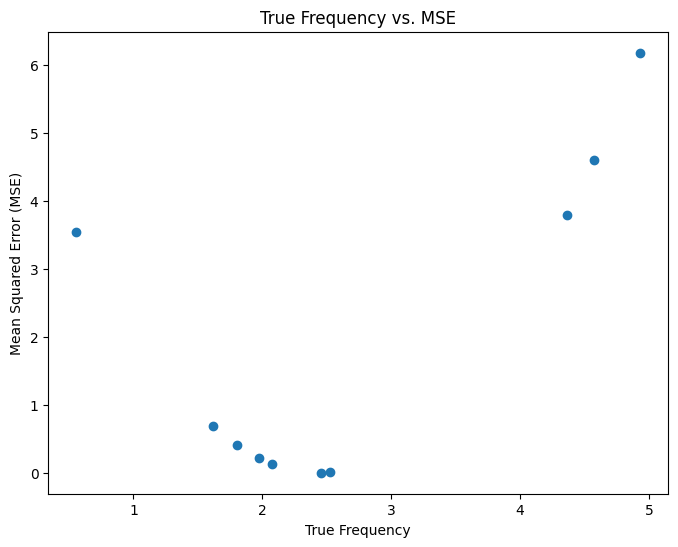

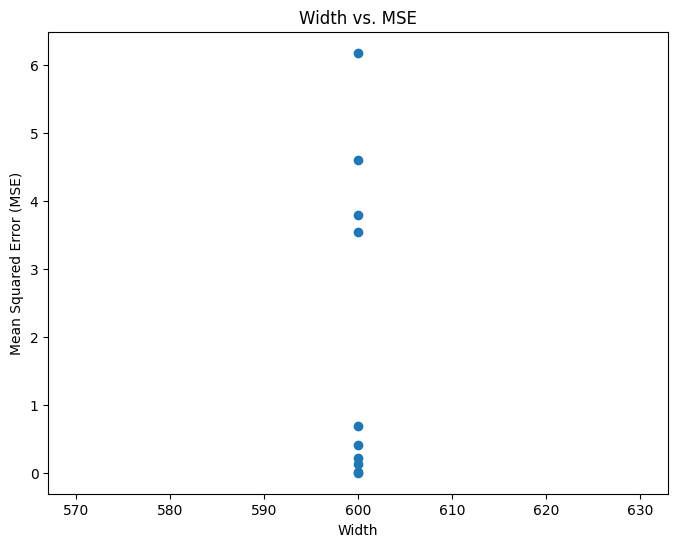

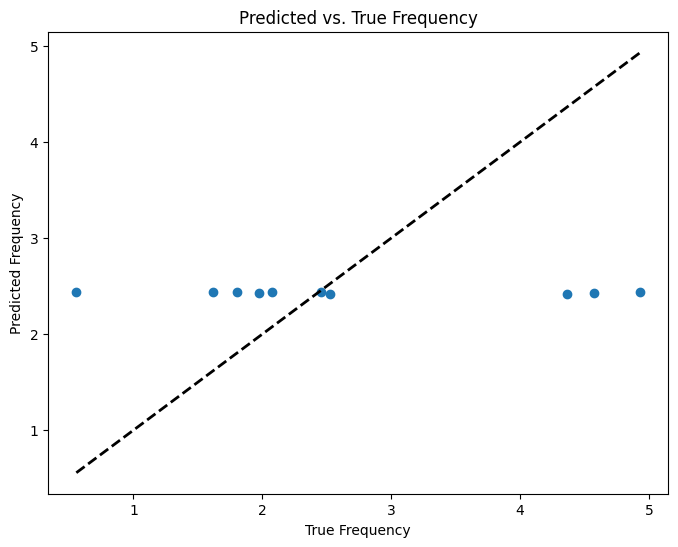

In [112]:
from src.models.cnn import cnn_train 
from transformer_artifical_data import artificial_dataset
from src.analysis.artificial_model_analysis import evaluate_model
from src.analysis.artificial_model_analysis import analyze_results

# Dummy test dataset
datasets, dfs = artificial_dataset.split_data_into_datasets(train=.333, val=.333, test=.333, no_samples=30, data_path=utils.path_from_proot('src/datasets/artificial_strips/w600px'))
# model = artificial_transformer.Transformer()

model, optimizer, trainin_losses, validation_losses, test_loss = cnn_train.train(1, datasets['train'], datasets['val'], datasets['test'])


eval_df = evaluate_model(model, datasets['test'], dfs['test'], masked_model=False)
analyze_results(eval_df)

 